### **Chapter 5: Resampling Methods**

Exercise 2

Part a: The probability of selecting any one observation, including the jth one, is 1/n. Therefore, the probability of not selecting the jth observation for the first bootstrap observation is: 1-1/n

Part b: Because each observation is independent the probability that the second bootstrap observation is not the jth observation is: 1-1/n




Part c: Let's consider that we are making n selections, since the bootstrap sample consists of n observations. We know that for each selection, the probability of not choosing the j-th observation is 1-1/n. And because the observations are independent, the probability that the jth observation is not in the bootstrap sample is: (1-1/n)^n


Part d: We know that the probability that the jth observation is not in the bootstrap sample is (1-1/n)^n. Therefore, the probability that the jth observation is in the bootstrap sample is: 1-(1-1/n)^n

Now, Let's find P(n=5): P(n=5)= 1-(1-1/5)^5=1-(4/5)^5= 0.672

Part e: We want to find P(n=100): P(n=100) = 1-(1-1/100)^10 = 1-(99/100)^100 = 0.634

part f: We want to find P(n=1000): P(n=10000) = 1-(1-1/10000)^10000 = 0.632

the probability that the jth observation is not in the bootstrap sample as n approaches infinity is: (1-1/n)^n = 1/e = 0.36788.
Therefore, the probability that the jth observation is in the bootstrap sample as n approaches infinity is: 1-1/e = 1-0.36788 = 0.632


### **Chapter 8: TREE BASED METHOD**

Exercise 8:

Part a:

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR , plot_tree , export_text)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [ ]:
carseats = pd.read_csv('/content/drive/MyDrive/Carseats.csv')

# Separate features (X) and target variable (y)
X = carseats.drop(columns='Sales')
y = carseats['Sales']


In [ ]:
# Specify categorical features that need encoding
categorical_features = ['ShelveLoc', 'Urban', 'US']

# Create a ColumnTransformer that will apply one-hot encoding to these features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'  # Keep other columns as is
)

a) Split the data set into a training set and a test set

In [ ]:
X_train ,X_test ,y_train ,y_test = skm.train_test_split(X,
carseats['Sales'], test_size=0.3, random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

b)Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

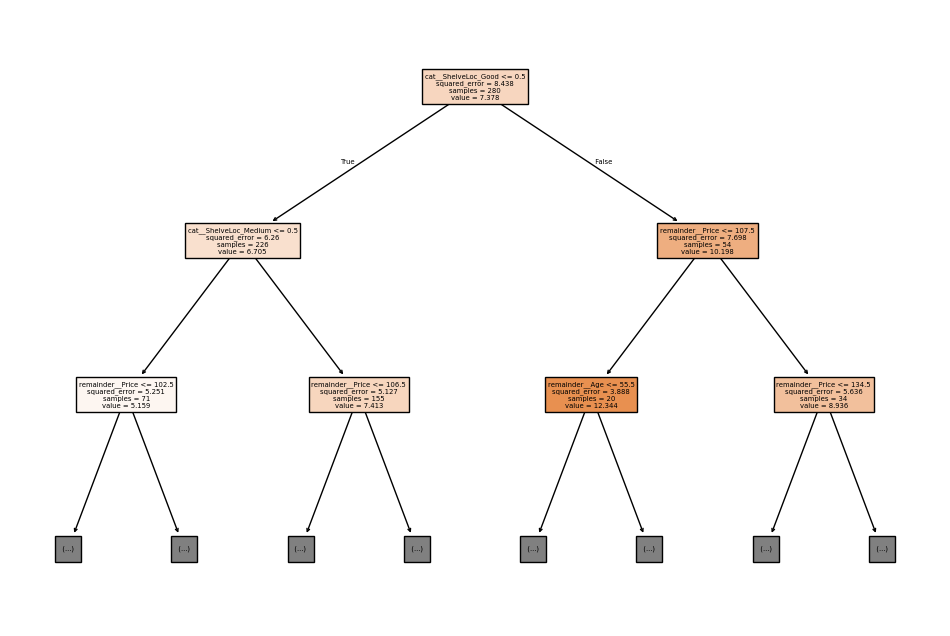

Test MSE: 3.7038582752360925


In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=0)
reg_tree.fit(X_train, y_train)

# focus on the top two levels
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), max_depth=2)
plt.show()

y_pred = reg_tree.predict(X_test)
test_mse = ((y_test - y_pred) ** 2).mean()
print(f'Test MSE: {test_mse}')

Interpretation: The top two levels of the regression tree reveal the primary factors driving sales in the Carseats dataset. By looking at these splits, we can understand which features the model believes are the most influential in determining Sales. This can offer actionable insights, such as focusing on product pricing or shelf placement to increase sales, depending on what the top-level splits show.

However, the Test MSE is significantly higher at 3.70. Which means it has higher variance and overfits the training data.

d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain?

In [ ]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=500, random_state=0)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

test_mse_bagging = ((y_test - y_pred_bagging) ** 2).mean()
print(f'Test MSE with Bagging: {test_mse_bagging}')

Test MSE with Bagging: 2.024325299156675


e) Use random forests to analyze this data. What test MSE do
you obtain? Use the feature_importance_ values to determine
which variables are most important. Describe the effect of m, the
number of variables considered at each split, on the error rate
obtained.

In [ ]:
randomforest_model = RandomForestRegressor(n_estimators=500, random_state=0)
randomforest_model.fit(X_train, y_train)

y_pred_rf = randomforest_model.predict(X_test)

test_mse_rf = ((y_test - y_pred_rf) ** 2).mean()
print(f'Test MSE with Random Forest: {test_mse_rf}')

rf_feature_importances = list(zip(X.columns, randomforest_model.feature_importances_))
rf_feature_importances.sort(key=lambda x: x[1], reverse=True)
print("Feature Importances in Random Forests:", rf_feature_importances)

Test MSE with Random Forest: 2.024143013716676
Feature Importances in Random Forests: [('Urban', 0.2861699951940799), ('CompPrice', 0.21999981122208626), ('US', 0.10529841513459506), ('Price', 0.10061638368080651), ('Income', 0.08507847533640919), ('Age', 0.06871479086079925), ('ShelveLoc', 0.053649496835251116), ('Education', 0.03982374480944194), ('Population', 0.006591334859490813), ('Advertising', 0.0041790974289831586)]


Both Random Forest and Bagging have almost identical performance, with a Test MSE of 2.02. These two models perform the best, suggesting that ensemble methods (which combine multiple trees) are well-suited for this dataset.

f) Now analyze the data using XGBOOST, and report your results.

In [ ]:
xgb_model = XGBRegressor(max_depth=3, n_estimators=1000, random_state=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Test MSE (XGBoost): {test_mse_xgb}")

Test MSE (XGBoost): 2.5461806191162326


The Test MSE with XGBoost is slightly higher at 2.55, which is still a good performance but indicates that XGBoost may need further optimization to outperform Random Forest or Bagging in this case.